## TF prob regression and plotting code

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_10 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_81 (Dense)            (None, 64)                128       
                                                                 
 dense_82 (Dense)            (None, 32)                2080      
                                                                 
 dense_83 (Dense)            (None, 16)                528       
                                                                 
 distribution_lambda_9 (Dist  ((None, 16),             0         
 ributionLambda)              (None, 16))                        
                                                                 
Total params: 2,739
Trainable params: 2,736
Non-train

ValueError: x and y must have same first dimension, but have shapes (100000,) and (1600000,)

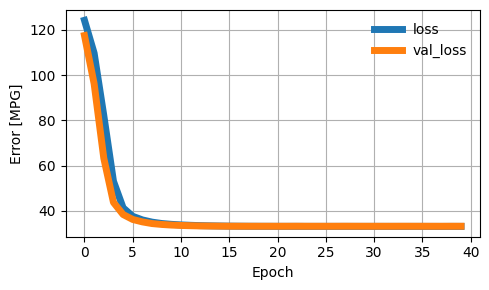

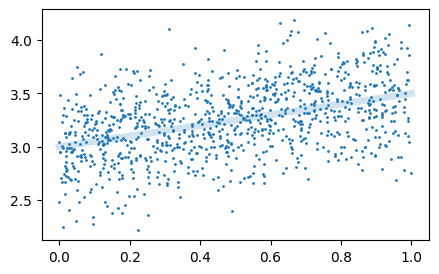

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow import keras
from tensorflow.keras import layers
tfd = tfp.distributions


NOISE = 0.3
X_RANGE = [0, 1]
N_TRUE = int(1e5)
N_OBS = int(N_TRUE * 0.01)

X_RAW = np.linspace(*X_RANGE, N_TRUE)
X_OBS = np.random.choice(X_RAW, N_OBS)


def get_f_with_noise(f:callable, noise=NOISE):
    return lambda x: f(x) + np.random.normal(0, noise, len(x))

class Regressor():
    def __init__(self, inputs, num_outputs, num_inputs=None):
        self.inputs = inputs
        if num_inputs==None:
            num_inputs = num_outputs
        self.n_inputs, self.n_outputs = num_inputs, num_outputs
        self.model = self.build_and_compile_model()
        self.train_time = 0
        self.history = None

    @staticmethod
    def neg_log_likelihood(y:np.ndarray, p_y:Callable):
        return -p_y.log_prob(y)

    def build_and_compile_model(self):
        model = keras.Sequential([
            self.normalising_layer(),
            layers.Dense(64, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(16, activation='relu'),
            tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=0.2)),
        ])
        model.compile(
            loss=self.neg_log_likelihood,
            optimizer=tf.keras.optimizers.Adam(0.001)
        )
        return model

    def train(self, x, y, epochs=100):
        self.history = self.model.fit(
            x, y,
            epochs=epochs,
            verbose=0,
            # Calculate validation results on 20% of the training data.
            validation_split=0.3,
            # callbacks=[tf.keras.callbacks.EarlyStopping(patience=25, min_delta=1e-4)]
        )

    def normalising_layer(self):
        normalizer = layers.Normalization(input_shape=[self.n_inputs ], axis=None)
        normalizer.adapt(np.array(self.inputs))
        return normalizer

    def __call__(self, data):
        return self.model.predict(data, verbose=0)

    def summary(self):
        self.model.summary()

    def plot_history(self):
        hist = self.history.history
        fig, ax = plt.subplots(1, 1, figsize=(5, 3))
        ax.plot(hist['loss'], label='loss', lw=5)
        ax.plot(hist['val_loss'], label='val_loss', lw=5)
        plt.xlabel('Epoch')
        plt.ylabel('Error [MPG]')
        plt.legend(frameon=False)
        plt.tight_layout()
        plt.grid(True)


def plot_data(x_raw, x_train, true_model, regression_model=None):
    x_train = np.sort(x_train)
    fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    l_kwgs = dict(lw=5, alpha=0.2)
    s_kwgs = dict(s=1, zorder=10)
    ax.plot(x_raw, true_model(x_raw), label=f"Raw ({N_TRUE} pts)", color='C0', **l_kwgs)
    ax.scatter(x_train, get_f_with_noise(true_model)(x_train), label=f"Train ({N_OBS} pts)", color="C0", **s_kwgs)
    if regression_model:
        y_pred_raw = regression_model(x_raw)
        print(y_pred_raw.shape)
        ax.plot(x_raw, y_pred_raw.flatten(), label="Pred", color='C3', **l_kwgs)
    ax.set_xlim(*X_RANGE)
    ax.set_xlabel("X Data")
    ax.set_ylabel("Y Data")
    ax.legend(frameon=False)
    plt.tight_layout()


def make_regressor_and_test(x_data, true_model, epochs=100):
    ml_model = Regressor(x_data, num_outputs=1)
    ml_model.summary()
    model_with_noise = get_f_with_noise(true_model)
    y_obs = model_with_noise(x_data)
    ml_model.train(x_data, y_obs, epochs)
    ml_model.plot_history()
    plot_data(X_RAW, X_OBS, true_model, ml_model)
    return ml_model



line_f = lambda x: 0.5 * x + 3
f = get_f_with_noise(line_f)
line_regressor = make_regressor_and_test(X_OBS, line_f, 40)
plot_data(X_RAW, X_OBS, line_f)

### Linear data

In [10]:
line_f = lambda x: 0.5 * x + 3
line_regressor = make_regressor_and_test(X_TRAIN, line_f, 40)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                64064     
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
 dense_21 (Dense)            (None, 16)                528       
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 68,017
Trainable params: 68,017
Non-trai

ValueError: in user code:

    File "/Users/avaj0001/Documents/projects/compas_dev/compas_venv/lib/python3.9/site-packages/keras-2.11.0rc2-py3.9.egg/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/Users/avaj0001/Documents/projects/compas_dev/compas_venv/lib/python3.9/site-packages/keras-2.11.0rc2-py3.9.egg/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/avaj0001/Documents/projects/compas_dev/compas_venv/lib/python3.9/site-packages/keras-2.11.0rc2-py3.9.egg/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/Users/avaj0001/Documents/projects/compas_dev/compas_venv/lib/python3.9/site-packages/keras-2.11.0rc2-py3.9.egg/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/Users/avaj0001/Documents/projects/compas_dev/compas_venv/lib/python3.9/site-packages/keras-2.11.0rc2-py3.9.egg/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/avaj0001/Documents/projects/compas_dev/compas_venv/lib/python3.9/site-packages/keras-2.11.0rc2-py3.9.egg/keras/engine/input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "dense_18" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=True
      • mask=None


### Sine curve

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                128       
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 32)                1056      
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dense_34 (Dense)            (None, 16)                272       
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-traina

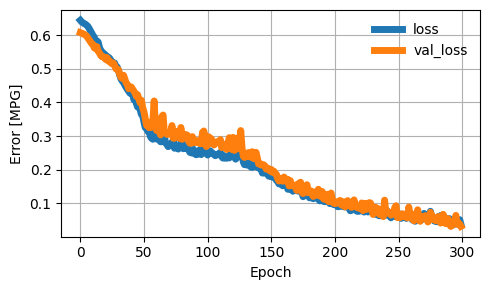

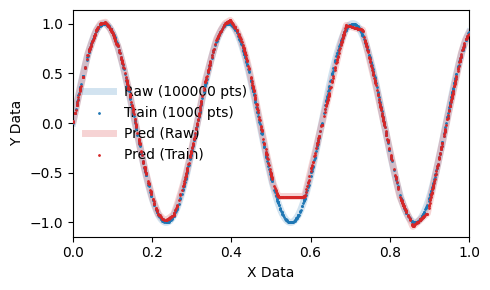

In [13]:
sin_f = lambda x: np.sin(x*20)
sin_regressor = make_regressor_and_test(X_TRAIN, sin_f, 300)

### Funky curve

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                128       
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 32)                1056      
                                                                 
 dense_39 (Dense)            (None, 16)                528       
                                                                 
 dense_40 (Dense)            (None, 16)                272       
                                                                 
 dense_41 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-traina

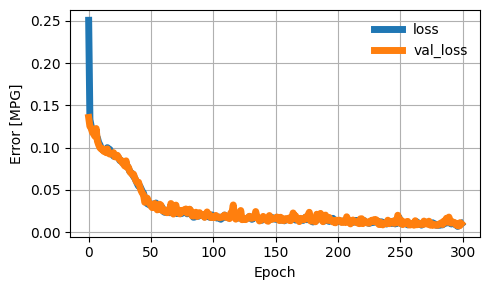

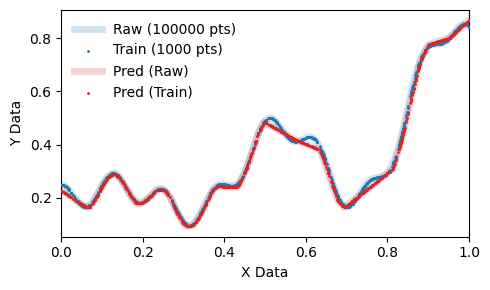

In [14]:
curvy_f = lambda x: 0.2 + 0.4 * x ** 2 + 0.3 * x * np.sin(15 * x) + 0.05 * np.cos(50 * x)
curvy_regressor = make_regressor_and_test(X_TRAIN, curvy_f, 300)